# Energy/Eigenvalue Distribution

In [30]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [9]:
fname = "../data/mbl_10x10_W15_C0.02_TU1_TD1_N100_BS10_B3_eigvals.dat"

In [15]:
eigvals = np.loadtxt(fname)
eigvals.shape

(14, 200)

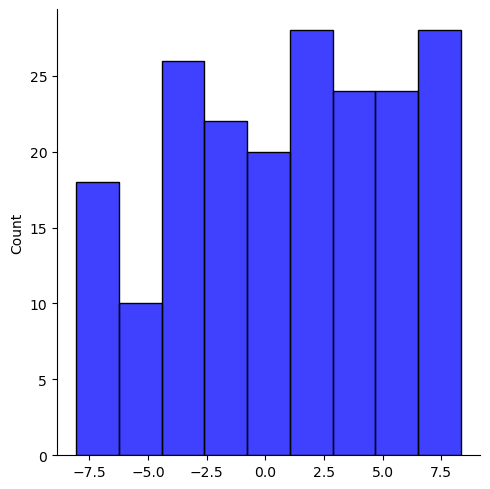

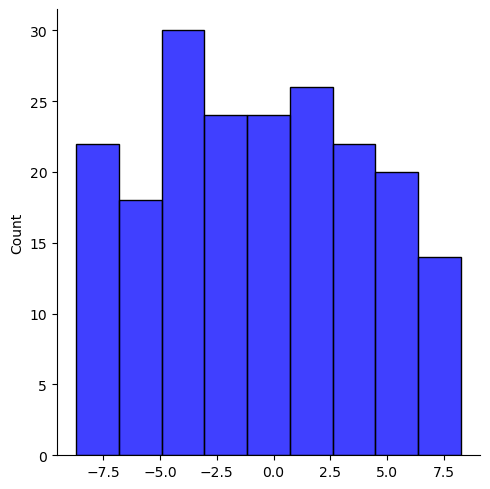

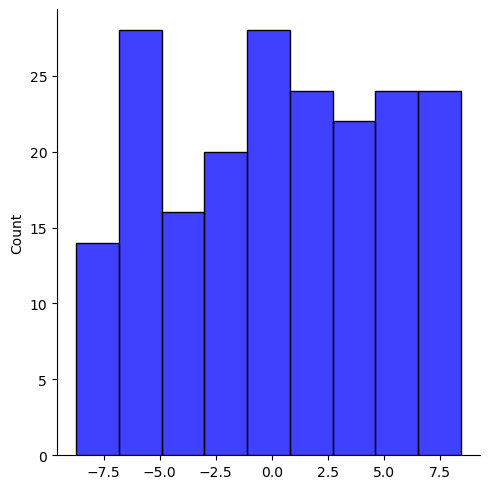

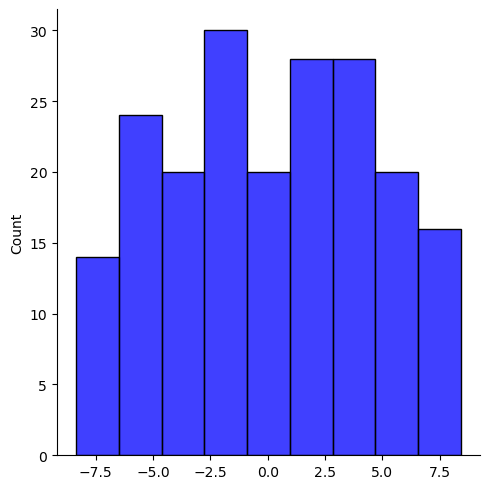

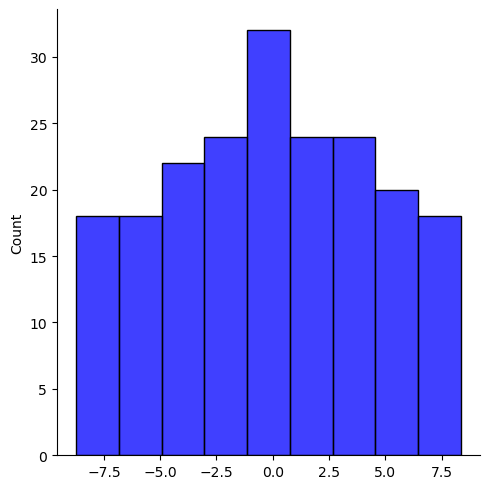

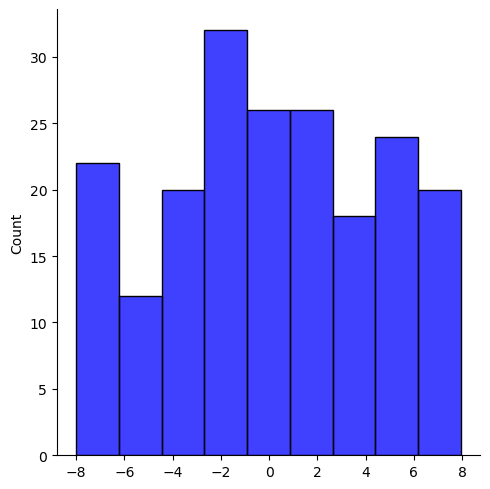

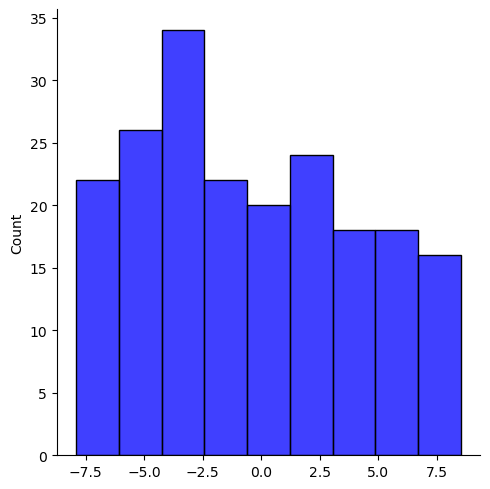

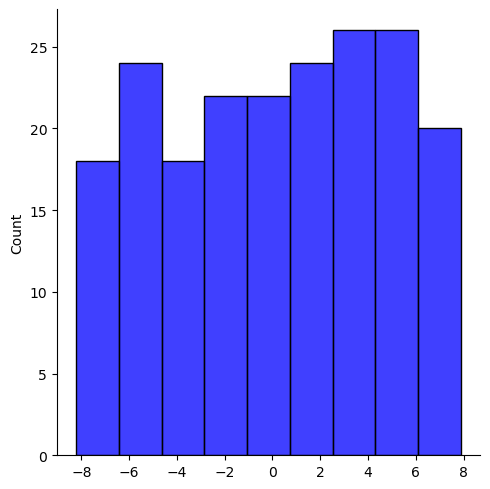

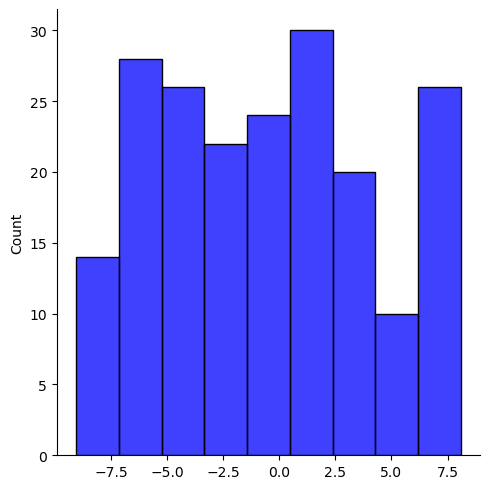

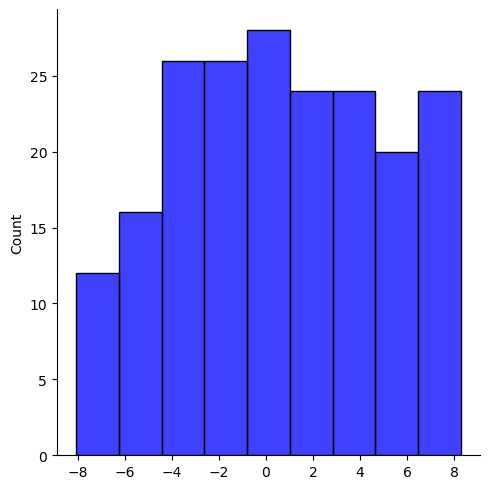

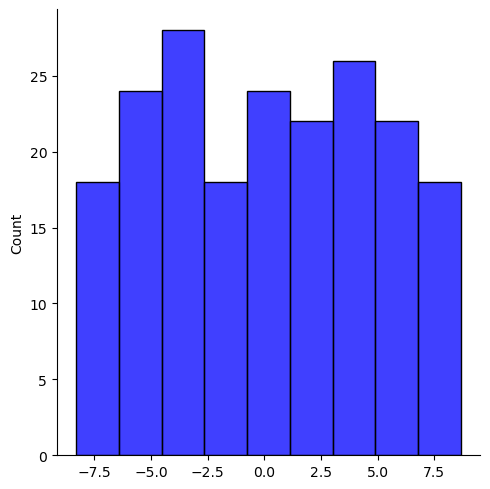

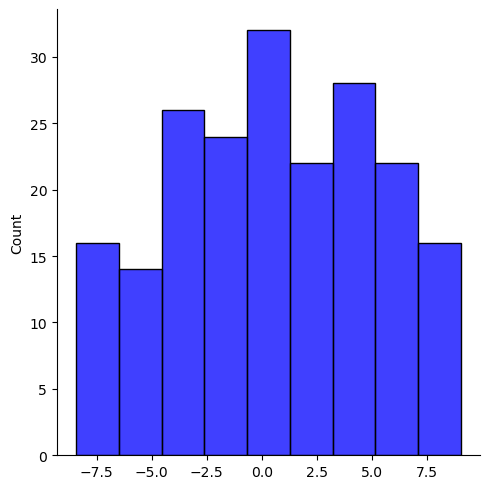

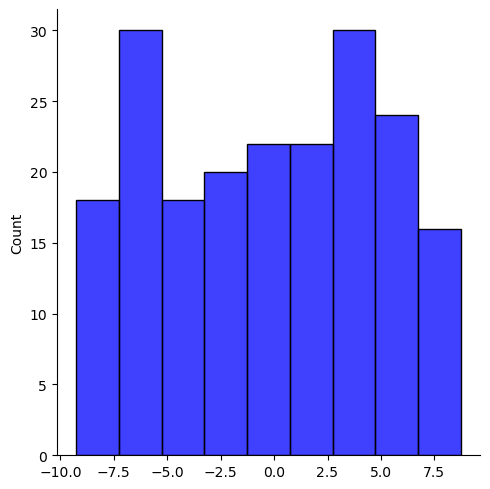

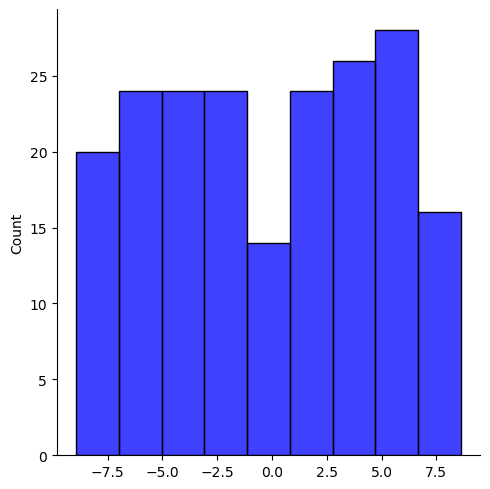

In [45]:
# fig, ax = plt.subplots(figsize=(9, 16))
bins = np.linspace(-9, 9, 30)
for i in range(14):
    sns.displot(eigvals[i, :], kind="hist", color="blue", label=f"{i}")
# plt.legend()